In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from PIL import Image

# Data Preprocessing

In [3]:
img = Image.open('../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Acura Integra Type R 2001/00198.jpg')
width, height = img.size

In [4]:
width, height

(600, 450)

In [5]:
path = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/'

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,valid_pct=0.2, 
                                  ds_tfms=get_transforms(), 
                                  size=300, bs=64, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

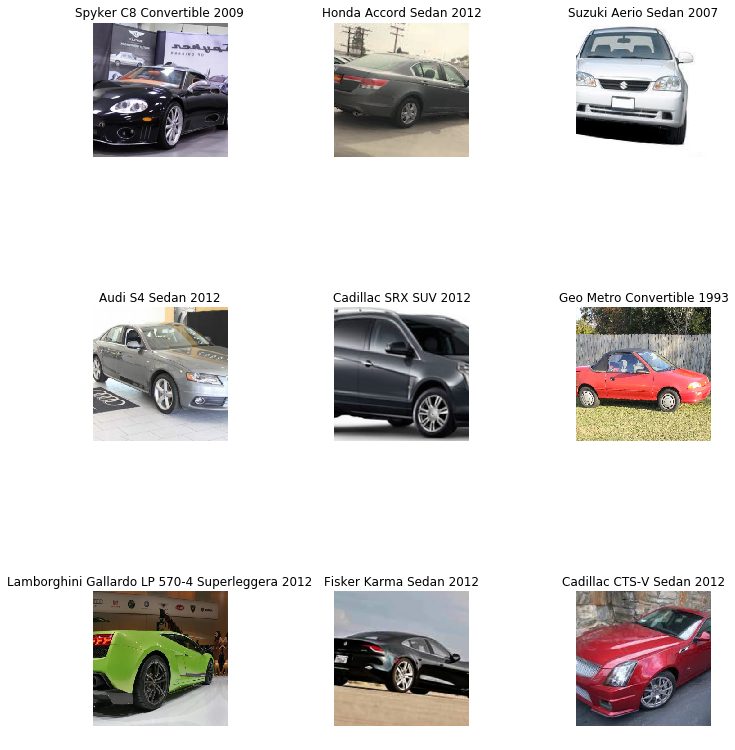

In [8]:
data.show_batch(rows=3, figsize=(10,12))

# Training Model

In [9]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate,accuracy], model_dir = '/kaggle/working/')

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 80.7MB/s]


As we know that 'fit_one_cycle' (based on Leslie Smith's 1-cycle policy) helps in getting
better results than 'fit' method.

In [10]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.543448,2.996759,0.697251,0.302749,07:28
1,2.870094,1.751652,0.454742,0.545258,07:23
2,1.859941,1.254546,0.337658,0.662342,07:34
3,1.361830,0.985369,0.278035,0.721965,07:41
4,1.012507,0.843562,0.240346,0.759654,08:00
5,0.805399,0.805966,0.232314,0.767686,07:58


In [11]:
learn.save('stage-1')

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


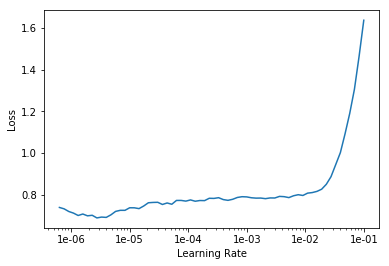

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(0.5*1e-4,0.5*1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.860389,0.863339,0.252703,0.747297,07:39
1,0.773066,0.602478,0.180414,0.819586,07:36
2,0.429276,0.424075,0.121718,0.878282,07:21
3,0.272153,0.377610,0.109978,0.890022,07:17


In [15]:
learn.save('stage-2')

# Interpretation

In [16]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


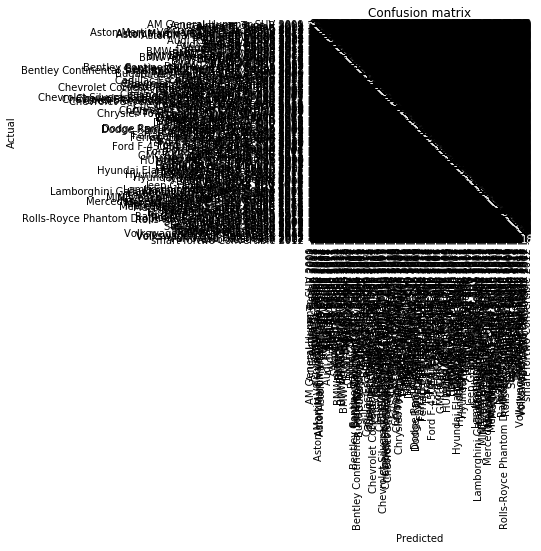

In [18]:
interp.plot_confusion_matrix()

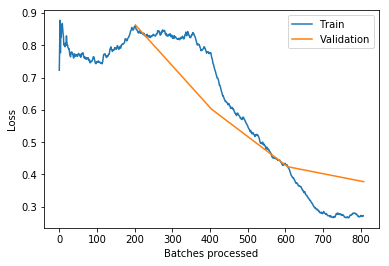

In [19]:
learn.recorder.plot_losses()

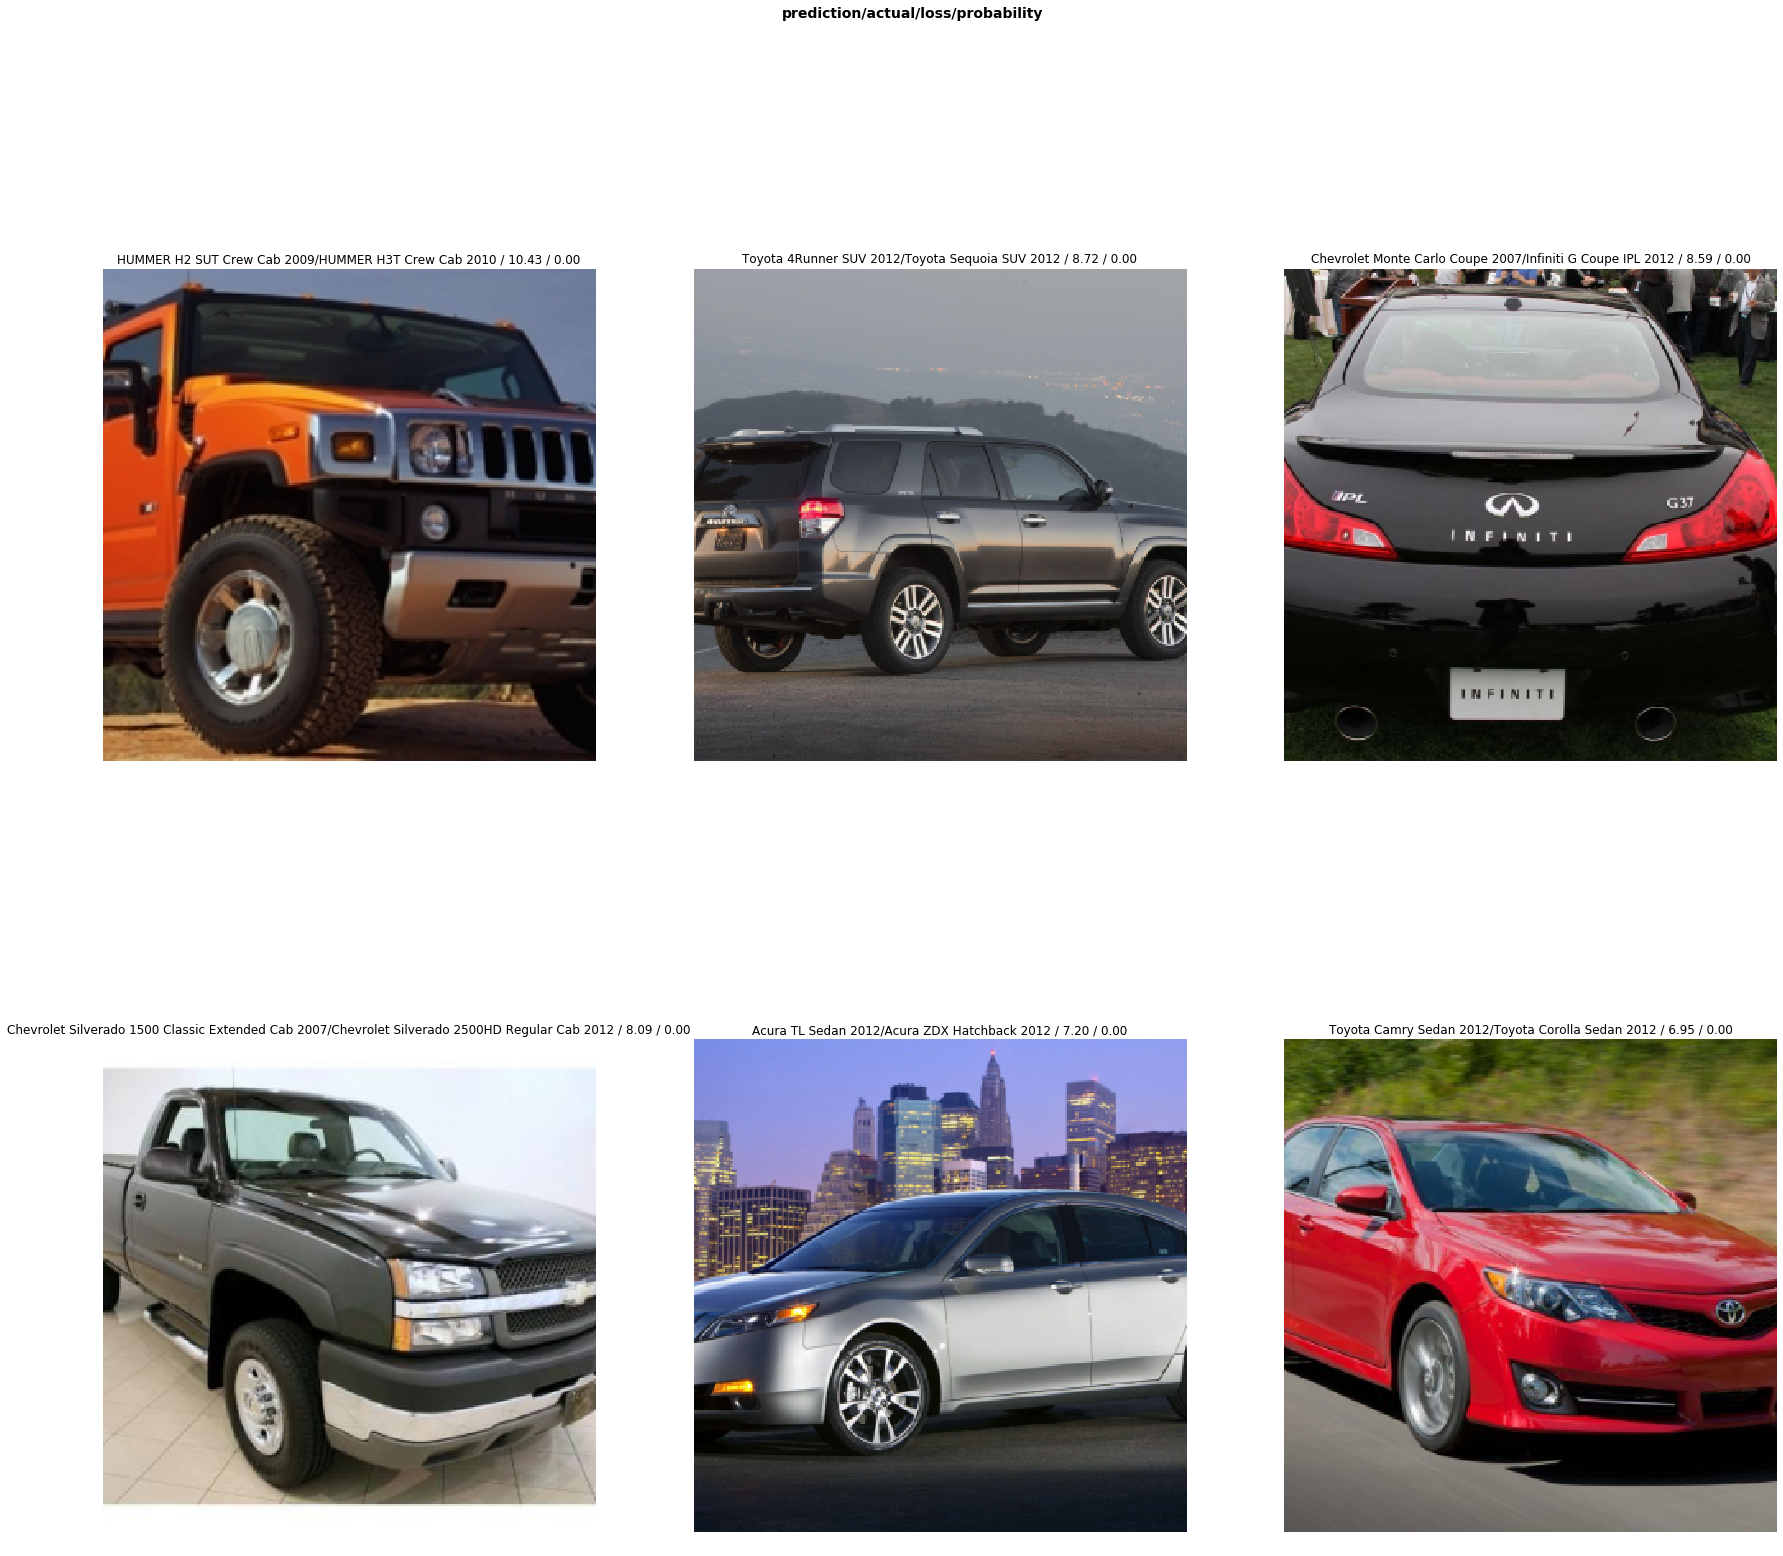

In [20]:
interp.plot_top_losses(6, figsize=(30,26))

In [21]:
interp.most_confused(min_val=4)

[('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 10),
 ('BMW M6 Convertible 2010', 'BMW 6 Series Convertible 2007', 6),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 6),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  6),
 ('Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 5),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('BMW 6 Series Convertible 2007', 'BMW M6 Convertible 2010', 4),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 4)]